In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("data/ride_data.csv")
df.head()

,ride_id,pickup_location,drop_location,request_timestamp,ride_hour,day_of_week,month,traffic_level,weather,vehicle_type,distance_km,duration_min,surge_multiplier,driver_rating,fare
0,1,Sealdah,Shyambazar,2024-05-20 07:15:00,7,Monday,5,low,clear,auto,5,7.5,1.00,4.2,69.09
1,2,Rajarhat,Dum Dum,2024-12-12 10:47:00,10,Thursday,12,medium,clear,yellow_taxi,11,24.1,1.26,3.8,264.95
2,3,Jadavpur,Esplanade,2024-10-29 00:27:00,0,Tuesday,10,low,clear,bike,11,14.3,1.00,4.4,121.85
3,4,Tollygunge,Park Street,2024-04-21 09:14:00,9,Sunday,4,high,clear,sedan,9,22.8,1.37,4.1,331.66
4,5,Esplanade,Dum Dum,2024-10-14 07:12:00,7,Monday,10,low,clear,sedan,10,16.5,1.00,4.8,252.49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200002 entries, 0 to 200001
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            200002 non-null  int64  
 1   pickup_location    200002 non-null  object 
 2   drop_location      200002 non-null  object 
 3   request_timestamp  200002 non-null  object 
 4   ride_hour          200002 non-null  int64  
 5   day_of_week        200002 non-null  object 
 6   month              200002 non-null  int64  
 7   traffic_level      200002 non-null  object 
 8   weather            200002 non-null  object 
 9   vehicle_type       200002 non-null  object 
 10  distance_km        200002 non-null  int64  
 11  duration_min       200002 non-null  float64
 12  surge_multiplier   200002 non-null  float64
 13  driver_rating      200002 non-null  float64
 14  fare               200002 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 22

In [6]:
df.describe(include="all")

,ride_id,pickup_location,drop_location,request_timestamp,ride_hour,day_of_week,month,traffic_level,weather,vehicle_type,distance_km,duration_min,surge_multiplier,driver_rating,fare
count,200002.000000,200002,200002,200002,200002.000000,200002,200002.000000,200002,200002,200002,200002.000000,200002.000000,200002.000000,200002.000000,200002.000000
unique,NaN,12,12,165437,NaN,7,NaN,3,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,Shyambazar,Shyambazar,2024-05-07 23:40:00,NaN,Monday,NaN,high,clear,auto,NaN,NaN,NaN,NaN,NaN
freq,NaN,23884,24096,6,NaN,28865,NaN,98098,146802,59995,NaN,NaN,NaN,NaN,NaN
mean,100001.500000,NaN,NaN,NaN,12.604889,NaN,6.492085,NaN,NaN,NaN,9.236838,23.545796,1.167578,4.005253,217.353194
std,57735.748607,NaN,NaN,NaN,6.558427,NaN,3.445948,NaN,NaN,NaN,5.386955,14.926987,0.194516,0.492057,133.174654
min,1.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,0.000000,3.000000,1.000000,2.500000,15.000000
25%,50001.250000,NaN,NaN,NaN,8.000000,NaN,3.000000,NaN,NaN,NaN,5.000000,12.100000,1.000000,3.800000,119.090000
50%,100001.500000,NaN,NaN,NaN,13.000000,NaN,7.000000,NaN,NaN,NaN,10.000000,21.600000,1.000000,4.000000,191.650000
75%,150001.750000,NaN,NaN,NaN,18.000000,NaN,9.000000,NaN,NaN,NaN,14.000000,32.700000,1.370000,4.200000,285.177500


In [7]:
df=df[df["pickup_location"]!=df["drop_location"]]
df.reset_index(drop=True,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182304 entries, 0 to 182303
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            182304 non-null  int64  
 1   pickup_location    182304 non-null  object 
 2   drop_location      182304 non-null  object 
 3   request_timestamp  182304 non-null  object 
 4   ride_hour          182304 non-null  int64  
 5   day_of_week        182304 non-null  object 
 6   month              182304 non-null  int64  
 7   traffic_level      182304 non-null  object 
 8   weather            182304 non-null  object 
 9   vehicle_type       182304 non-null  object 
 10  distance_km        182304 non-null  int64  
 11  duration_min       182304 non-null  float64
 12  surge_multiplier   182304 non-null  float64
 13  driver_rating      182304 non-null  float64
 14  fare               182304 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 20

In [9]:
df.describe(include="all")

,ride_id,pickup_location,drop_location,request_timestamp,ride_hour,day_of_week,month,traffic_level,weather,vehicle_type,distance_km,duration_min,surge_multiplier,driver_rating,fare
count,182304.000000,182304,182304,182304,182304.000000,182304,182304.000000,182304,182304,182304,182304.000000,182304.000000,182304.000000,182304.000000,182304.000000
unique,NaN,12,12,153185,NaN,7,NaN,3,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,Shyambazar,Shyambazar,2024-11-05 09:53:00,NaN,Monday,NaN,high,clear,auto,NaN,NaN,NaN,NaN,NaN
freq,NaN,20942,21154,6,NaN,26347,NaN,88516,133873,54798,NaN,NaN,NaN,NaN,NaN
mean,99986.816466,NaN,NaN,NaN,12.602044,NaN,6.491470,NaN,NaN,NaN,10.133546,25.516087,1.167131,4.005739,233.087447
std,57728.598620,NaN,NaN,NaN,6.556296,NaN,3.446048,NaN,NaN,NaN,4.769653,14.161533,0.194200,0.492350,128.803497
min,1.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,2.000000,3.000000,1.000000,2.500000,26.360000
25%,49988.750000,NaN,NaN,NaN,8.000000,NaN,4.000000,NaN,NaN,NaN,6.000000,14.700000,1.000000,3.800000,138.120000
50%,100000.500000,NaN,NaN,NaN,13.000000,NaN,7.000000,NaN,NaN,NaN,10.000000,23.300000,1.000000,4.000000,204.735000
75%,149997.250000,NaN,NaN,NaN,18.000000,NaN,9.000000,NaN,NaN,NaN,14.000000,34.000000,1.370000,4.200000,298.190000


In [10]:
df["pickup_location"].value_counts()

pickup_location
Shyambazar     20942
Esplanade      19638
Tollygunge     18162
Park Street    17896
Sealdah        16304
Bagbazar       14832
Jadavpur       14774
Dum Dum        14676
Salt Lake      13144
Garia          13054
New Town        9442
Rajarhat        9440
Name: count, dtype: int64

In [11]:
df["drop_location"].value_counts()

drop_location
Shyambazar     21154
Esplanade      19532
Tollygunge     18177
Park Street    18087
Sealdah        16280
Dum Dum        14740
Bagbazar       14680
Jadavpur       14598
Garia          13134
Salt Lake      12939
Rajarhat        9570
New Town        9413
Name: count, dtype: int64

In [12]:
df["day_of_week"].value_counts()


day_of_week
Monday       26347
Thursday     26257
Tuesday      26088
Sunday       26040
Wednesday    26025
Saturday     25812
Friday       25735
Name: count, dtype: int64

In [13]:
df.columns

Index(['ride_id', 'pickup_location', 'drop_location', 'request_timestamp',
       'ride_hour', 'day_of_week', 'month', 'traffic_level', 'weather',
       'vehicle_type', 'distance_km', 'duration_min', 'surge_multiplier',
       'driver_rating', 'fare'],
      dtype='object')

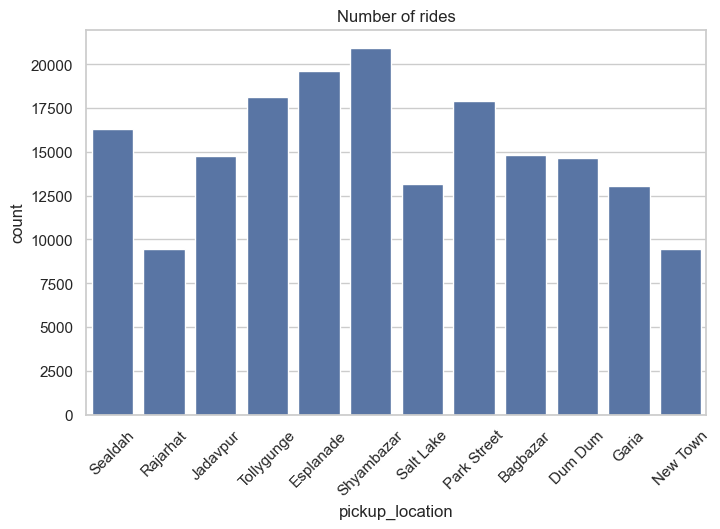

In [14]:
sns.countplot(x="pickup_location", data=df)
plt.title("Number of rides")
plt.xticks(rotation=45)
plt.show()


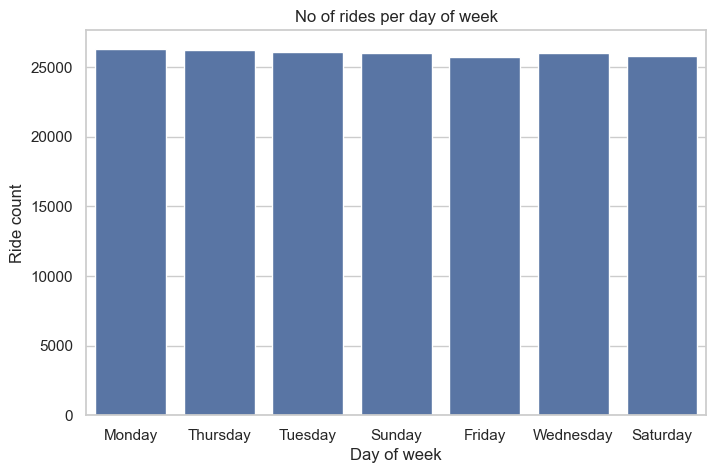

In [15]:
sns.countplot(data=df, x="day_of_week")

plt.title("No of rides per day of week")
plt.xlabel("Day of week")
plt.ylabel("Ride count")

plt.show()


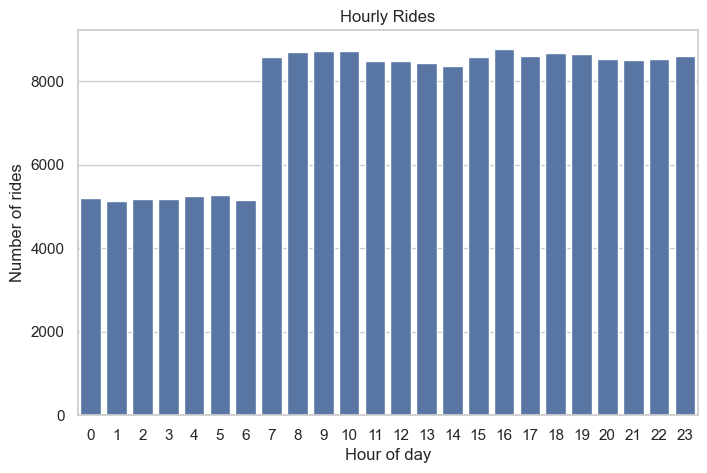

In [16]:
sns.countplot(data=df,x="ride_hour")
plt.title("Hourly Rides")
plt.xlabel("Hour of day")
plt.ylabel("Number of rides")
plt.show()

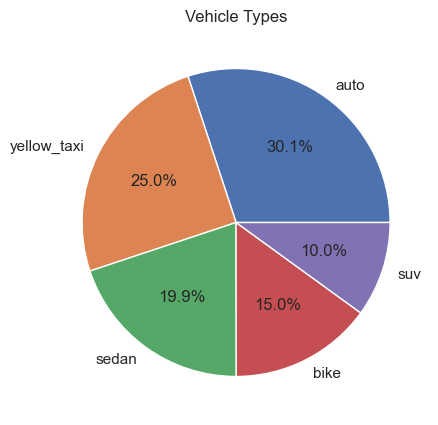

In [17]:


counts = df["vehicle_type"].value_counts()
labels = counts.index
sizes = counts.values

plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%"
)

plt.title("Vehicle Types")

plt.show()


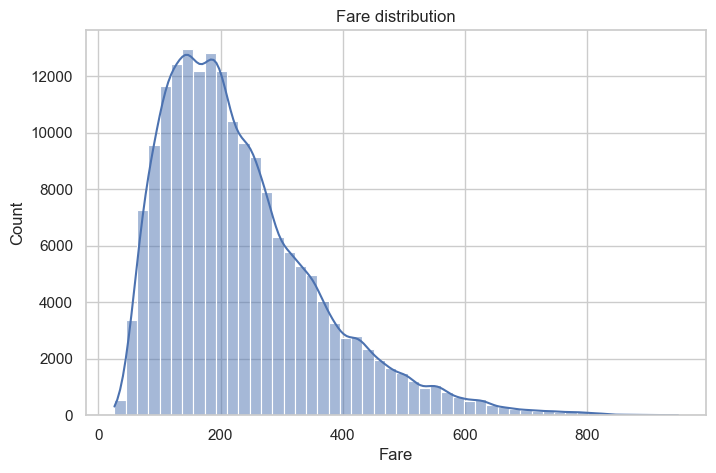

In [18]:
sns.histplot(df["fare"],kde=True,bins=50)
plt.title("Fare distribution")
plt.xlabel("Fare")
plt.ylabel("Count")

plt.show()

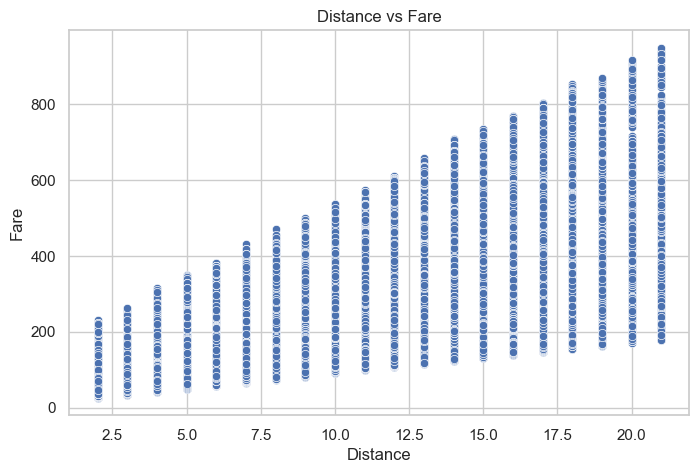

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="distance_km", y="fare")

plt.title("Distance vs Fare")
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.show()


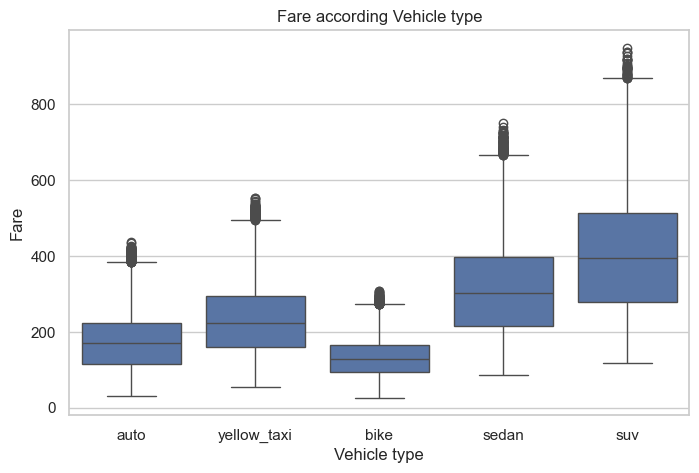

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="vehicle_type", y="fare")

plt.title("Fare according Vehicle type")
plt.xlabel("Vehicle type")
plt.ylabel("Fare")

plt.show()


In [21]:
df.to_csv("ride_data_modified.csv", index=False)